# 代表地
## 平均

### 算術平均
$$
\bar{x}　= \frac{x_1 + x_2 + \cdots + x_n}{n} = \frac{1}{n} \sum_{i=1}^{n} x_i
$$

In [1]:
#　算術平均
import numpy as np
apple_weights = [100, 105, 120, 90, 110]
np.mean(apple_weights)

np.float64(105.0)

### 幾何平均
$$
\bar{x}_g = \sqrt[n]{x_1 \cdot x_2 \cdot \cdots \cdot x_n}
$$


In [4]:
from scipy import stats
# 幾何平均
stats.gmean(apple_weights)

np.float64(104.52042041766784)

### 調和平均

In [5]:
velocities = [20, 60]
velocities_mean = stats.hmean(velocities)
velocities_mean

np.float64(30.0)

## 中央値

In [ ]:
import numpy as np
import time

randoms = np.random.randn(10**7)

before_mean = time.time()
mean = np.mean(randoms) # 平均
after_mean = time.time()
print('mean is {} (time:{:.2f}s)'.format(mean, after_mean - before_mean)) # {:.2f}は小数点以下2桁まで表示

before_median = time.time()
median = np.median(randoms) # 中央値
after_median = time.time()
print('median is {} (time:{:.2f}s)'.format(median, after_median - before_median))

mean is 0.0008027311865286348 (time:0.00s)
median is 0.0006635363329809198 (time:0.08s)


In [9]:
from scipy import stats
mode, count = stats.mode([6, 2,4,5,1,3,5,3, 4])
print(mode) # 最頻値
print(count) # 最頻値の出現回数

3
2


In [12]:
# arrayで最頻値
array = [[1,5,4,2], [1,2,3,4], [12,2,3,4]]
mode, count = stats.mode(array, axis=0)
print(mode) # 最頻値
print(count) # 最頻値の出現回数

[1 2 3 4]
[2 2 2 2]


## 四分位範囲(interquartile range: IQR) と 四分位偏差(quartile deviation: QD)
- 範囲(range)=最大値-最小値：外れ値に弱い
- 四分位数(quartile):データをソートした時に4等分する位置にある値
- 第2四分位数は中央値
- 四分位範囲(IQR):第3四分位数-第1四分位数．範囲より外れ値に強い
- 四分位偏差(QD):IQRの半分

IQR: 22.0
QD: 11.0


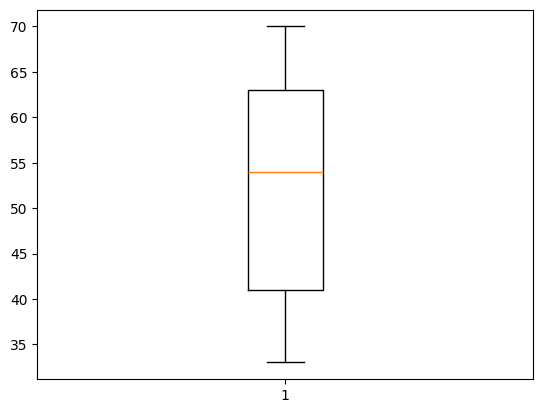

In [14]:
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline


data = [33, 35, 36, 39, 43, 49, 51, 54, 54, 56, 62, 64, 64, 69, 70]

iqr = stats.iqr(data)
qb =iqr/2

print('IQR: {}'.format(iqr))
print('QD: {}'.format(qb))


# 箱の高さがIQR
plt.boxplot(data)
plt.show()


## 分散と標準偏差

In [19]:
import numpy as np
def get_variance(samples):
    mean = np.mean(samples) # 平均
    deviations = samples - mean # 偏差
    square_deviations = deviations * deviations # 偏差の二乗
    sum_square_deviations = np.sum(square_deviations) # 偏差の二乗の和
    variance = sum_square_deviations / len(samples) # 分散
    return variance

samples = [1, 2, 3, 4, 5]
print('分散(自作の関数): {}'.format(get_variance(samples)))
print('Numpyの関数で分散を計算: {}'.format(np.var(samples)))


分散(自作の関数): 2.0
Numpyの関数で分散を計算: 2.0


In [20]:
# SciPyを使用して、分散と標準偏差を計算
from scipy import stats
print('分散(SciPyの関数): {}'.format(stats.tvar(samples)))
print('標準偏差(SciPyの関数): {}'.format(stats.tstd(samples)))


分散(SciPyの関数): 2.5
標準偏差(SciPyの関数): 1.5811388300841898


### ※ NumpyとScipyの違い
Numpyは分散、Scipyは不偏分散を計算している
分散：偏差の二乗の和をデータの個数で割る
不偏分散：偏差の二乗の和をデータの個数-1で割る

In [29]:
population = np.array([1, 5, 10, 11, 14, 15, 15, 16, 18, 18, 19, 20, 25, 30])
# ランダムに値を抽出
samples = np.random.choice(population, size=3)
print('population variance is {}'.format(np.var(population)))
print('sample variance is {}'.format(np.var(samples)))
print('samples: {}'.format(samples))

population variance is 51.392857142857146
sample variance is 2.6666666666666665
samples: [16 18 14]


# まとめ
- 「範囲」は最小と最大を扱えるが、外れ値には弱い
- 「IQR/QD」は外れ値に強いが、データの分布については何も言えない（信頼度が低い）
- 「平均偏差」は平均との差を扱うが、絶対値を扱うため計算が煩雑になる
- 「分散」は２乗することで計算を容易にするが、単位も２乗されてしまう
- 「標準偏差」は単位を変えずに、分散の平方根を取ることで、分散の単位を元に戻す

## 「平均±標準偏差」の範囲にどれくらいのデータが存在するか？
平均: $\bar{x}$

標準偏差: $s$

- $\bar{x} ± s$ の範囲に約2/3のデータが存在する
- $\bar{x} ± 2s$ の範囲に約95%のデータが存在する
- $\bar{x} ± 3s$ の範囲に約99%のデータが存在する




In [44]:
randoms = np.random.rand(1000) # 0~1の乱数を1000個生成
mean = np.mean(randoms)
std = np.std(randoms) # 標準偏差

count = 0 # 平均±標準偏差の範囲に存在するデータの数

for i in randoms:
    if i > mean - std and i < mean + std:
        count += 1

print('{}% の数字が mean±std の範囲に存在する'.format(int(count/len(randoms) * 100)))

59% の数字が mean±std の範囲に存在する


/var/folders/6p/tytvzrts6c78tztzqyltfbbw0000gn/T/ipykernel_81989/2871396810.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(randoms)


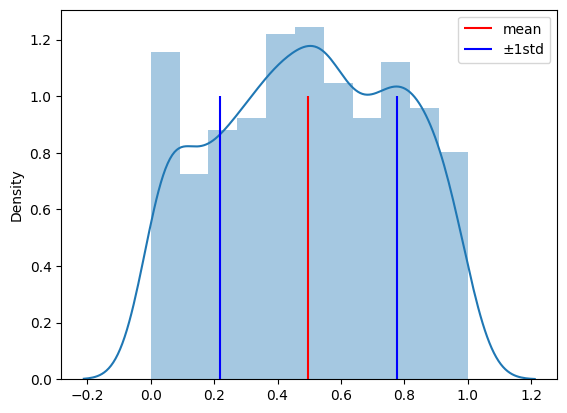

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.distplot(randoms)
plt.vlines(mean, 0, 1, 'r', label='mean')
plt.vlines(mean+std, 0, 1, 'b', label='±1std')
plt.vlines(mean-std, 0, 1, 'b')
plt.legend()

# 標準化
平均：０
標準偏差：１

In [60]:
import numpy as np

data = [0, 10, 20, 25, 27, 30, 43, 56, 68, 70]
mean = np.mean(data)
std = np.std(data)

# 標準化
z = (data - mean) / std

print('標準化： {}'.format(z))
print('標準化後の平均： {:.2f}'.format(np.mean(z)))
print('標準化後の標準偏差： {}'.format(np.std(z)))

# print(np.mean(z)) 出力結果：6.661338147750939e-17
# この数字は、6.661338147750939 x 10^-17 という意味で、ほぼ0に等しい

標準化： [-1.54799532 -1.10444365 -0.66089199 -0.43911615 -0.35040582 -0.21734032
  0.35927685  0.93589402  1.46815602  1.55686636]
6.661338147750939e-17
標準化後の平均： 0.00
標準化後の標準偏差： 1.0


In [63]:
# sklearnを使用した標準化
from sklearn.preprocessing import StandardScaler
data = np.array([0, 10, 20, 25, 27, 30, 43, 56, 68, 70]) # 1次元のデータ
print('data shape: {}'.format(data.shape))
data = np.expand_dims(data, axis=-1) # 2次元のデータに変換
print('reshaped data shape: {}'.format(data.shape))

scaler = StandardScaler()

scaled = scaler.fit_transform(data) # 標準化(引数に渡すデータは2次元のデータにする必要がある)
print(scaled)

data shape: (10,)
reshaped data shape: (10, 1)
[[-1.54799532]
 [-1.10444365]
 [-0.66089199]
 [-0.43911615]
 [-0.35040582]
 [-0.21734032]
 [ 0.35927685]
 [ 0.93589402]
 [ 1.46815602]
 [ 1.55686636]]


/var/folders/6p/tytvzrts6c78tztzqyltfbbw0000gn/T/ipykernel_81989/1769610278.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(tscore)


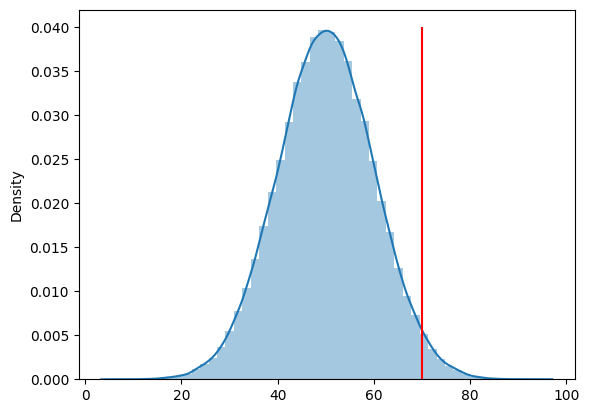

In [64]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

samples = np.random.randn(100000)
tscore = samples*10 + 50
sns.distplot(tscore)
plt.vlines(70, 0, 0.04, 'r')

## 共分散

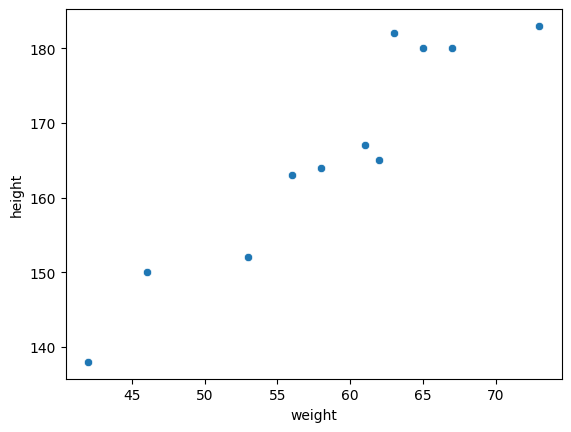

In [69]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

weight = np.array([42, 46, 53, 56, 58, 61, 62, 63, 65, 67, 73])
height = np.array([138, 150, 152, 163, 164, 167, 165, 182, 180, 180, 183])

sns.scatterplot(x=weight, y=height)

plt.xlabel('weight')
plt.ylabel('height')
plt.show()

In [70]:
# 共分散
np.cov(weight, height)

array([[ 82.81818182, 127.54545455],
       [127.54545455, 218.76363636]])

In [71]:
# bias=True: 不偏共分散(分母にnを使う)
# デフォルトは、分母にn-1を使う
np.cov(weight, height, bias=True)

array([[ 75.2892562 , 115.95041322],
       [115.95041322, 198.87603306]])

In [72]:
import pandas as pd
df = pd.DataFrame({'weight': weight, 'height': height})
df

,weight,height
0,42,138
1,46,150
2,53,152
3,56,163
4,58,164
5,61,167
6,62,165
7,63,182
8,65,180
9,67,180


In [73]:
df.cov()

,weight,height
weight,82.818182,127.545455
height,127.545455,218.763636


## 相関関数

In [74]:
import numpy as np
weight = np.array([42, 46, 53, 56, 58, 61, 62, 63, 65, 67, 73])
height = np.array([138, 150, 152, 163, 164, 167, 165, 182, 180, 180, 183])

# corrcoef: correlation coefficient
r = np.corrcoef(weight, height)
r

array([[1.        , 0.94757714],
       [0.94757714, 1.        ]])

In [75]:
import pandas as pd
df = pd.DataFrame({'weight': weight, 'height': height})
df.corr()


,weight,height
weight,1.000000,0.947577
height,0.947577,1.000000


<Axes: >

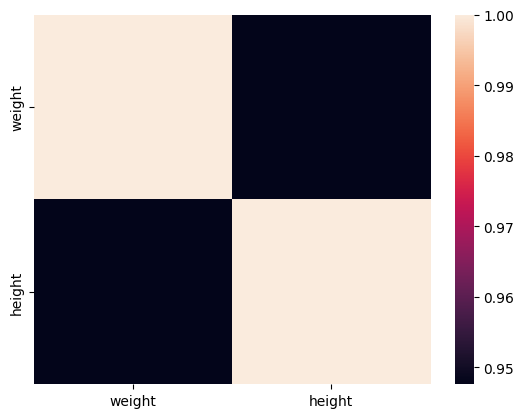

In [76]:
import seaborn as sns
sns.heatmap(df.corr())

## 強い相関と弱い相関
- 0.7~1: 強い相関
- 0.4~0.7: 中程度の相関
- 0~0.4: 弱い相関
- -0.4~0: 弱い負の相関
- -0.7~-0.4: 中程度の負の相関
- -1~-0.7: 強い負の相関

相関係数の３ポイント
- 関係数は0.7を超えると強い相関で，0.2以下はほぼ相関なし
- 相関係数だけをみるのは危険なので，できるだけ散布図も合わせて確認する
- 相関関係はあくまでも集団における傾向であって因果関係を示すものではない

Text(0.5, 1.0, 'r=0.48')

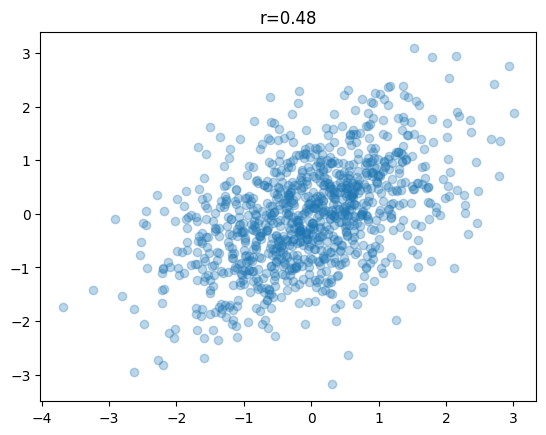

In [82]:
import numpy as np
def generate_values(r=0.5, num=1000):
    
    # 値を標準正規分布からランダムで作成
    a = np.random.randn(num)
    # 誤差項1 'a'に誤差項1を加えたものをxとする
    e1 = np.random.randn(num)
    # 誤差項2　'a'に誤差項2を加えたものをyとする
    e2 = np.random.randn(num)
    # 相関係数が負の場合，負の平方根になってしまうので，xの式を負にする
    if r < 0:
        r = -r
        x = -np.sqrt(r)*a - np.sqrt(1-r)*e1
    else:
        x = np.sqrt(r)*a + np.sqrt(1-r)*e1
    y = np.sqrt(r)*a + np.sqrt(1-r)*e2
    # 相関行列からxとyの相関係数を取得
    actual_r = np.corrcoef(x, y)[0][1]
    
    return x, y, actual_r

x, y ,actual_r = generate_values()
plt.scatter(x, y, alpha=0.3)
plt.title('r={:0.2f}'.format(actual_r))

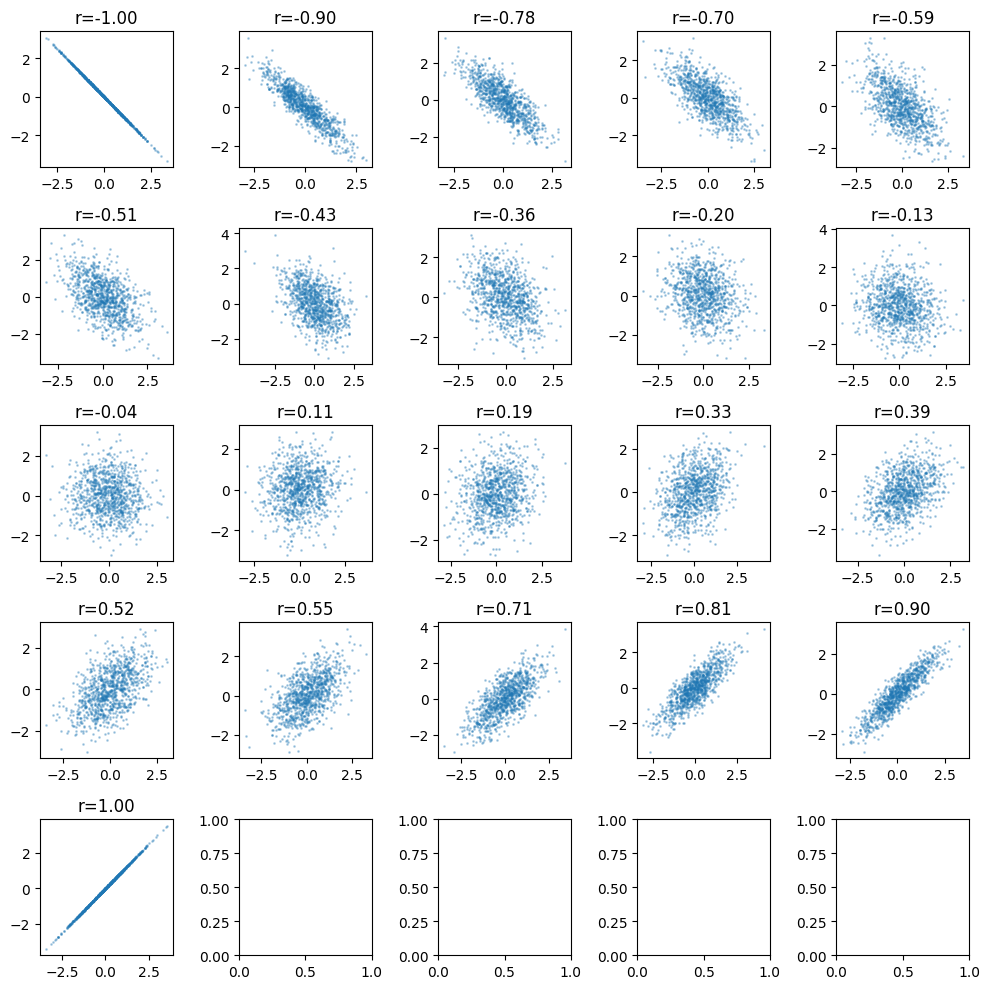

In [81]:
# -1から1の相関係数の散布図を0.1単位で表示したい(計21個)

# 7x3の図を表示する(計21個なので)
rows = 5
cols = 5
figsize = (10, 10)
fig, ax = plt.subplots(rows, cols, figsize=figsize)
for idx, r in enumerate(np.arange(-1, 1.1, 0.1)):
    # 各plotのどこに配置するかを計算
    row_i = idx//cols 
    col_i = idx%cols
    #相関係数に対してランダムな値を計算
    x, y, actual_r = generate_values(r=r)
    #生成したランダム値から実際の相関係数を表示
    title = 'r={:.2f}'.format(actual_r)
    ax[row_i, col_i].set_title(title)
    ax[row_i, col_i].scatter(x, y, alpha=0.3, s=1)
# タイトルや軸が重なってしまうのを防ぐ
fig.tight_layout()

## 回帰
- 回帰は条件付き平均
- 回帰直線はy=a+bxのように表す
- 回帰直線は残差の二乗を最小にするように引く（最小二乗法)

<Axes: >

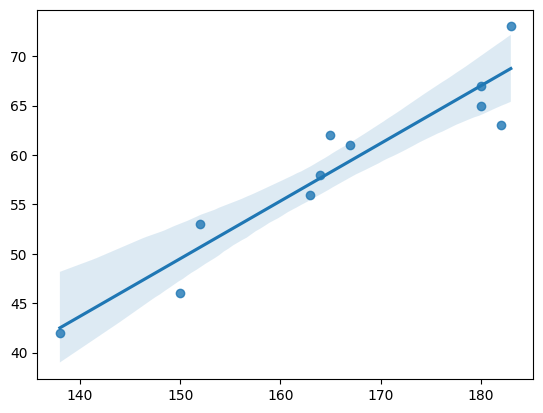

In [ ]:
weight = np.array([42, 46, 53, 56, 58, 61, 62, 63, 65, 67, 73])
height = np.array([138, 150, 152, 163, 164, 167, 165, 182, 180, 180, 183])
# 回帰プロット
sns.regplot(x=height, y=weight)

"""
下記のグラフの値は、各体重での身長の条件付き平均を表している
青い範囲の中に、真の回帰直線がある確率が95%
実際の線は最小二乗法を用いて引かれている
"""

In [88]:
from sklearn.linear_model import LinearRegression
#① 説明変数は，shapeが(サンプル数，特徴量数)のndarrayにします．特徴量数は，今回は身長だけなので1ですね．
X = np.expand_dims(height, axis=-1)
#② 目的変数のshapeは(サンプル数)でOKなのでこのまま使います．
y = weight
#③ インスタンスを作ります．
reg = LinearRegression()
#④ .fit()関数で，そのモデルのアルゴリズムを与えられたデータで"学習"することができます．
reg.fit(X, y) #すると'reg'が学習済みのモデルになります．

#回帰係数(b)と切片(a)はそれぞれ以下のようにしてアクセスすることができます．
# .coef_はndarrayで返ってきます．shapeはX.shape次第です．
print("b={}".format(reg.coef_))
print("a={}".format(reg.intercept_))

b=[0.58302859]
a=-37.94946808510641


In [89]:
#標準偏差
s_x = np.std(height)
s_y = np.std(weight)
#平均
mean_x = np.mean(height)
mean_y = np.mean(weight)
#相関係数
r = np.corrcoef(weight, height)[0][1]
b = r * s_y/s_x
a = mean_y - b*mean_x
print("b={}".format(b))
print("a={}".format(a))

b=0.5830285904255319
a=-37.94946808510638


Text(0, 0.5, 'weight')

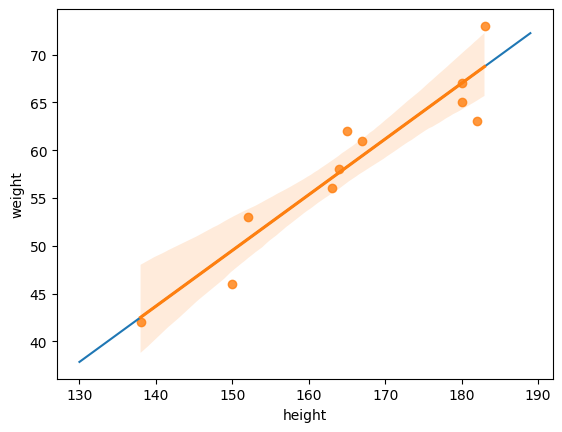

In [92]:
#x軸の値作成
x = np.arange(130, 190, 1)
plt.plot(x, b*x+a)
# seaborn のregplotも合わせて描画する．
sns.regplot(x=height, y=weight)
plt.xlabel('height')
plt.ylabel('weight')

In [93]:
x = np.array([[175]])
y = reg.predict(x)
print(x,y)

[[175]] [64.08053524]


## 決定係数
説明変数がどれだけ目的変数の値を説明（決定）しているかの指標